# Logistic Regression

The logistic regression is a type of regression that predicts a probability of an outcome given one or more indipendent variables (input columns). This method can be used for clasification, which means predicting categories rather than numbers.
Indeed, there are situations where we would the variables to be discrete rather than continuos. So, the logistic regression is trained on an output variable that is discrete (0 or 1) or categorical (whole numbers, as 1, 2, 3 and 4), and it gives back a probability as a result that can be converted into a discrete value with a threshold.

## Performing a Logistic Regression

The logistic function is an S-shaped curve, also known as $sigmoid$ $curve$, that for a given set of input variables, produces an output variable between 0 and 1. And because of that, it can be used to represent a probability.
Here the logistic function that outputs a probability $y$ for one input variable $x$:
- $p = \dfrac{1.0}{1.0 + e^{-(\beta_0 + \beta_1x_1)}}$

The $x$ variable is the independent or the input variable, whereas $\beta_0$ and $\beta_1$ are the coefficients we need to solve for. We can see a linear function in the exponent, which in this case is known as the log-odds function. As in the case of linear regression, we can extend the logistic regression to more than one input variable as shown in the following formula:
- $p = \dfrac{1.0}{1.0 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ...)}}$

In [2]:
# Example 6-1 The logistic function in Python for one indipendent variable
import math

def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(bo + b1 * x)))
    return p

1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


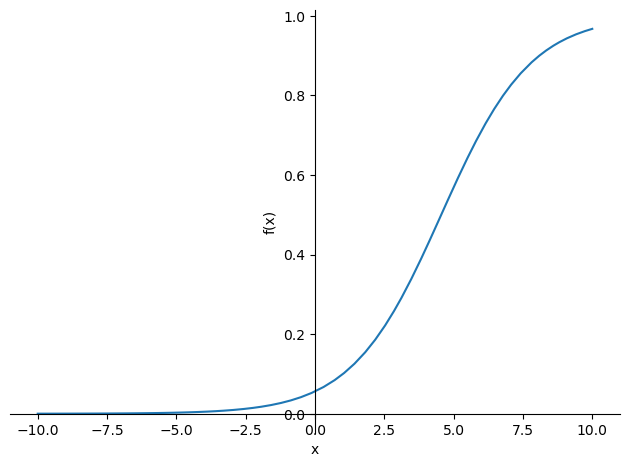

In [6]:
from sympy import *
# Define our vars
b0, b1, x = symbols('b0 b1 x')

# Logistic function
p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

# Plug in values for b0 and b1
p = p.subs(b0, -2.823)
p = p.subs(b1, 0.62)
print(p)

# Plot it
plot(p)

## Fit the Logistic Curve

In order to fit a logistic curve to a given training data set, we need the output variable must be. Then we need to solve for the beta zero and beta one with fusions to fit our logistic function. But instead of using least squares, as in the case of a linear regression, here we use the maximum likelihood estimation. Which maximizes the likelihood and give a logistic curve with output the observed data.

In other words, the MLE is an approach used to compute the coefficients ($\beta_0$, $\beta_1$, ...) so that our logistic curve (see the above logistic function) with these coefficients plugged in is going to output the observed data, of course, as closely as possible to the observed data.

In [13]:
# Example 6-3
import pandas as pd
from sklearn.linear_model import LogisticRegression

# DF
df = pd.read_csv("https://bit.ly/33ebs2R", delimiter=",", header=0)
df.head()

# Extract input vars
X = df.values[:, :-1]
# Extract output var
Y = df.values[:, -1]

# Logistic function
model = LogisticRegression(penalty="none")  # Otherwise it uses a Ridge or Lasso Regression
model.fit(X, Y)
b0 = model.intercept_.flatten()  # Withouth flatten it returns [[0.69267212]]. So, the aim 
# of using flatten is to reduce the dimensionality of the matrix considered
b1 = model.coef_.flatten()
print(b0, b1)

[-3.17576395] [0.69267212]


SKIP from page 200 to 204. There are discussed how to find manually the coefficients through Gradient Descent on logistic regression.

## Multivariable Logistic Regression

In [27]:
# Example 6-9 Doing a multivariable logistic regression on employees data
import pandas as pd
from sklearn.linear_model import LogisticRegression

# DF
df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",", header=0)
print(df.head())

# Inputs
inputs = df.values[:, :-1]
# Outputs
output = df.values[:, -1]

# Model
fit = LogisticRegression(penalty="none").fit(inputs, output)
print("Coefficients:", model.coef_.flatten())
print("Intercept:", model.intercept_.flatten())

# Make a prediction and compute its probabilities
prediction = fit.predict([[0, 27, 1, 2]])
probability = fit.predict_proba([[0, 27, 1, 2]])
print("Prediciton:", prediction)  # The employee does not quit
print("Probabilities:", probability.flatten())  # The probability the employee does not quit is 90.85% whereas he does is at 9.14%.

   SEX  AGE  PROMOTIONS  YEARS_EMPLOYED  DID_QUIT
0    0   25           2               3         0
1    0   30           2               3         0
2    0   26           2               3         0
3    0   25           1               2         0
4    0   28           1               2         0
Coefficients: [ 0.03213405  0.03682453 -2.50410028  0.9742266 ]
Intercept: [-2.73485302]
Prediciton: [0]
Probabilities: [0.90856497 0.09143503]


As shown above the predict_proba() functions returns an array with 2 values, the first being the probability to not quit (False, 0) and the second to quit (True, 1).
We also see the first 2 coefficients are quite low, almost 0, meaning that are not so useful here in this case whereas the other 2 are stronger. In addition, recall that in order to make a meaningful prediction we need to test within the range of our data.

## Understanding the Log-Odds

Before we defined the exponent value as a linear function ($\beta_0 + \beta_1x$). Recall the logistic function:
- $p = \dfrac{1.0}{1.0 + e^{-(\beta_0 + \beta_1x_1)}}$

Specifically, this linear function is called $log-odds$ function, why so?


If we recall previous result regarding the simple logistic function:
- $\beta_0 = -3.17576395$; 
- $\beta_1 = 0.69267212$.

Then, if we wanted to compute the probability of having a sympthom aftwer 6 hours ($x = 6$) we really just need to plug these values into the logistic function, so:
- $p = \dfrac{1.0}{1.0 + e^{-(\beta_0 + \beta_1x_1)}}$ = $p = \dfrac{1.0}{1.0 + e^{-(-3.17576395 + 0.69267212*6)}}$ = $0.72716$.

Let's see this from a odd perspective and compute the odds through the formula we learned in Chapter 2:
- $odds = \dfrac{p}{1 - p}$ = $\dfrac{0.72716}{1 - 0.72716}$ = $2.6651$.

This result tells us that after 6 hours a patient is 2.6 times more likely to show symptoms than not show symptoms. 

But how do we get the log-odds? Changing the odds formula into a natural logarithm:
- logit function = $log(\dfrac{p}{1 - p})$ = $log(\dfrac{0.72716}{1 - 0.72716})$ = $0.9802$.

The result coming from the logit function is the log-odds. We treat the results  greater than 0 as favoring odds an event will happen whereas anything less than 0 is against an event. Moreover, a log-odds of -1.05 is linearly the same distance from 0 to 1.05, whereas this equivalent does not hold in plain odds, meaning there is a lack of symmetry.

Now, we can show how the result coming from the logit function, so, the log-odds, is the same result coming from the initial linearn function in the exponent:
- $\beta_0 + \beta_1x$ = $-3.17576395 + 0.69267212*6$ = $0.9802$.

That's why we call this linear function, the log-odds function.

Another benefit from using odds is that we can compare different x-values. For example, let's find the $p$ for 6 and 8 hours:
- $p_6 = \dfrac{1.0}{1.0 + e^{-(-3.17576395 + 0.69267212*6)}}$ = $0.72716$;
- $p_8 = \dfrac{1.0}{1.0 + e^{-(-3.17576395 + 0.69267212*8)}}$ = $0.9141$.

Then, convert it to plain odds:
- $o_6 = $\dfrac{0.72716}{1 - 0.72716}$ = $2.6651$;
- $o_8 = $\dfrac{0.9141}{1 - 0.9141}$ = $10.6505$.

Then, we compute the odds-ratio where the odds for 8 is the numerator and for 6 the denominator:
- $\dfrac{10.6505}{2.6651}$ = $3.9962$.

This means that our odds of showing sympthoms increases by nearly a factor of 4 with an extra 2-hours of exposure. This value holds across any 2-hour range, from 2 to 4, from 4 to 6...
However, this value will different for other range lenghts.

## R-Squared

Just like in linear regression there is an $R^2$, which indicates how well a given indipendent variable explains a dependent one, even for logistic regression.
However, there is not a consensus on the best way to calculate it in this case. A popular technique is the $Pseudo\;R^2$ which mimics the one employed for linear regressions:
- $Pseudo\;R^2 = \dfrac{log\;likelyhood - log\;likelyhood\;fit}{log\;likelyhood}$

In order to get the $log\;likelyhood\;fit$ we have to take the log() of each point on the logistic curve and sum them, considering as well that we need to convert the false likelyhoods by subtracting from 1.0.

In [6]:
# Example 6-10 Calculating the log-likelyhood of the fit
from math import log, exp
import pandas as pd

# Data
patient_data = pd.read_csv("https://bit.ly/33ebs2R", delimiter=",").itertuples()

# Set beta0 and beta1
b0 = -3.17576395
b1 = 0.69267212


# Logistic function
def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Log-likelyhood fit
log_likelyhood_fit = sum(log(logistic_function(p.x)) * p.y + \
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y) for p in patient_data)
print(log_likelyhood_fit)

-9.946161673231583


Then, we need to compute the $log\;likelyhood$ to do so we first compute the $likelyhood$:
- $likelyhood$ = $\dfrac{\sum{y_i}}{n}$.

Then, as before, we do so for each point and we account for false likelyhoods.

In [9]:
# Example 6-13 Log likelyhood of patients
from math import log, exp
import pandas as pd

# Data
patient_data = list(pd.read_csv("https://bit.ly/33ebs2R", delimiter=",").itertuples())

# Set beta0 and beta1
b0 = -3.17576395
b1 = 0.69267212


# Logistic function
def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

likelyhood = sum(p.y for p in patient_data) / len(patient_data)
log_likelyhood = sum(log(likelyhood) * p.y + \
                         log(1.0 - likelyhood) * (1.0 - p.y) for p in patient_data)
print(log_likelyhood)

-14.341070198709906


Then, we just need to plug these values into the previous cited formula in order to get back $R^2$.

In [14]:
# Example 6-14 R^2 fpr a logistic regression
from math import log, exp
import pandas as pd

# Data
patient_data = list(pd.read_csv("https://bit.ly/33ebs2R", delimiter=",").itertuples())

# Set beta0 and beta1
b0 = -3.17576395
b1 = 0.69267212


# Logistic function
def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Log-likelyhood fit
log_likelyhood_fit = sum(log(logistic_function(p.x)) * p.y + \
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y) for p in patient_data)

# Log-likelyhood
likelyhood = sum(p.y for p in patient_data) / len(patient_data)
log_likelyhood = sum(log(likelyhood) * p.y + \
                         log(1.0 - likelyhood) * (1.0 - p.y) for p in patient_data)

# R^2
r2 = (log_likelyhood - log_likelyhood_fit) / (log_likelyhood)
print(r2)

0.306456105756576


So, we can conclude that hours of exposure is mediocre for predicting symptoms.

## P-Values

However, the $R^2$ is not enough. We need to check whether we saw this data by chance rather than because of an actual relationship. This means we need to compute the p-value.
To do so, we need to use the $chi-square \; distribution$. If we take each value in a standard normal distribution (mean 0 and std 1) and square it that will give us this distribution with one degree of freedom. In our case the degrees of fredoom is one since our parameters are 2 (one X and one Y), $df = n -1$.
Then, the formula to get $chi-square$ value is the following:
- $\chi^2 = 2(log\;likeliihood\;fit) - (log\;likelihood)$.

Once we got the value  of the distribution we can campute its corrisponding p-value through this formula:
- $p-value = chi(2(log\;likeliihood\;fit) - (log\;likelihood))$.

In [18]:
# Example 6-15 P-value for a given logistic regression
import pandas as pd
from math import log, exp
from scipy.stats import chi2

# Data
patient_data = list(pd.read_csv("https://bit.ly/33ebs2R", delimiter=",").itertuples())

# Set beta0 and beta1
b0 = -3.17576395
b1 = 0.69267212


# Logistic function
def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Log-likelyhood fit
log_likelyhood_fit = sum(log(logistic_function(p.x)) * p.y + \
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y) for p in patient_data)

# Log-likelyhood
likelyhood = sum(p.y for p in patient_data) / len(patient_data)
log_likelyhood = sum(log(likelyhood) * p.y + \
                         log(1.0 - likelyhood) * (1.0 - p.y) for p in patient_data)

# P-value
chi2_value = 2 * (log_likelyhood_fit - log_likelyhood)
p_value = chi2.pdf(chi2_value, 1)  # 1 is the df
print(p_value)

0.0016604875618753787


This p-value is way below the .05 threshold, meaning that this relationship did not happen by random chance.

## Train/Test Splits

When we are dealing with more variables rely on statistical metric like R^2 and p-values become less practical, that's why we can use also here the train/test split methodology (to reduce over-fitting as well).

In [19]:
# Example 6-16 Performing a logistic regressiion with three-fold CV
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Data
df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")

# X
X = df.values[:, :-1]
# Y
Y = df.values[:, -1]

# Log. regression - k=3. shuffle = True -> Whether to shuffle the data 
# before splitting into batches. Note that the samples within each split 
# will not be shuffled.
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty="none")
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(f"Accuracy Mean: {results.mean()} (std={results.std()})")

[0.61111111 0.61111111 0.61111111]
Accuracy Mean: 0.6111111111111112 (std=0.0)


## Confusion Matrices